In [1]:
library(forecast)
library(tseries)
library(lmtest)
library(Hmisc)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



Разбиваем выборку на тестовую и обучающую часть и делаем из данных временной ряд.

In [2]:
data <- read.table('5.csv', sep = ',')[2]$V2
k <- 20
train <- data[1:(length(data) - k)]
test <- data[(length(data) - k + 1):length(data)]
tSeries <- ts(data = train, frequency = 6)
x_test_begin = 28.67
x_test_end = (35.17 + 28.67) / 2
x_test = seq(x_test_begin, x_test_end, length.out = k)

Смотрим на предсказания с экспоненциальным сглаживанием. Зеленый цвет - реальные значения. Синие - предсказания.

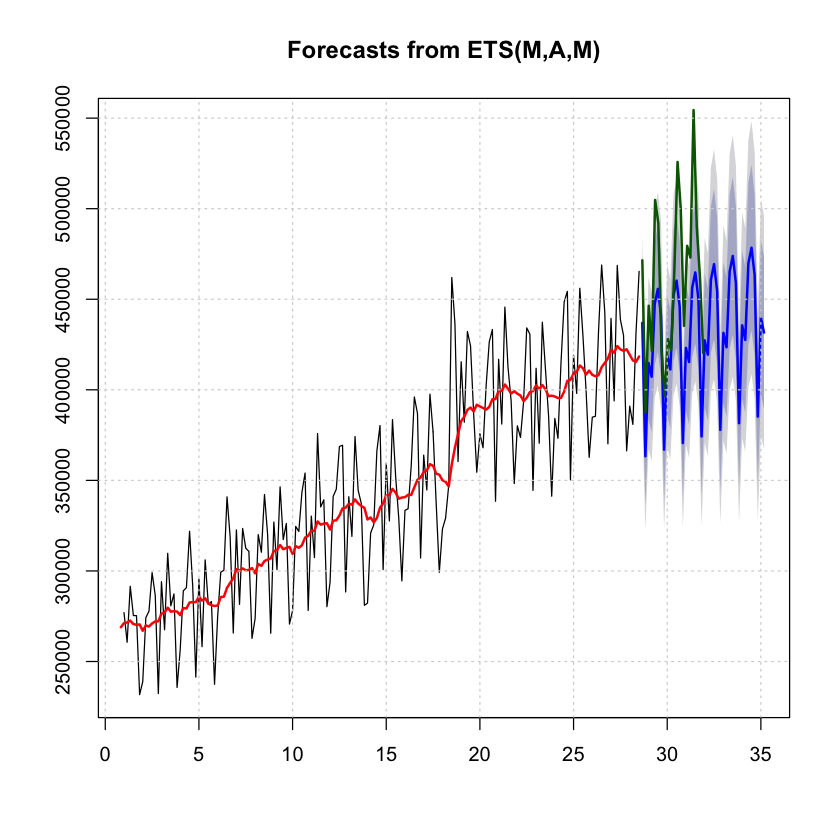

In [3]:
fit_ets <- ets(tSeries)
plot(forecast(fit_ets, h = 2 * k))
lines(x_test, test, col = 'dark green', lwd = 2)
lines(fit_ets$states[, 1], col = 'red', lwd = 2)
grid()

То же самое с ARIMA

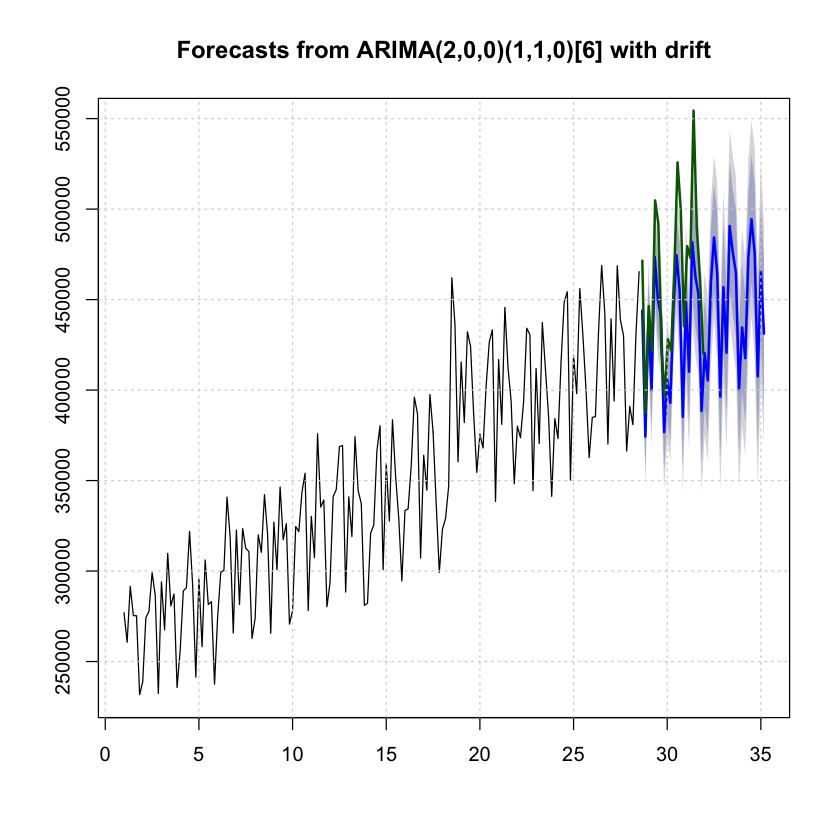

In [4]:
fit_arima <- auto.arima(tSeries)
plot(forecast(fit_arima, h = 2 * k))
lines(x_test, test, col = 'dark green', lwd = 2)
lines(fit_arima$states[, 1], col = 'red', lwd = 2)
grid()

И STL

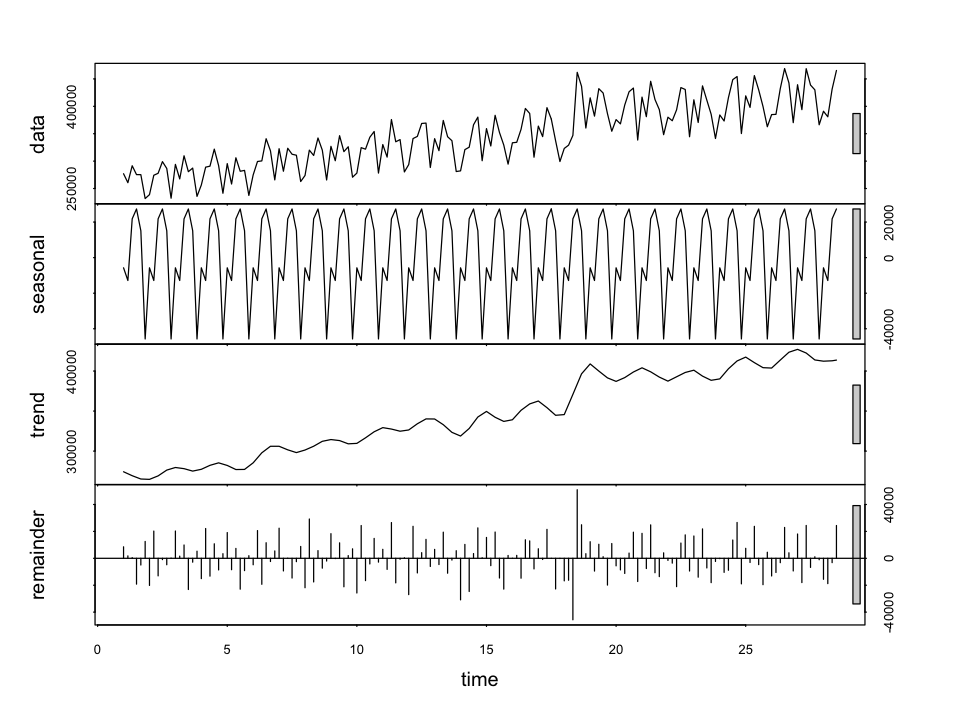

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6)
stl.decompose <- stl(tSeries, s.window="periodic")
plot(stl.decompose)

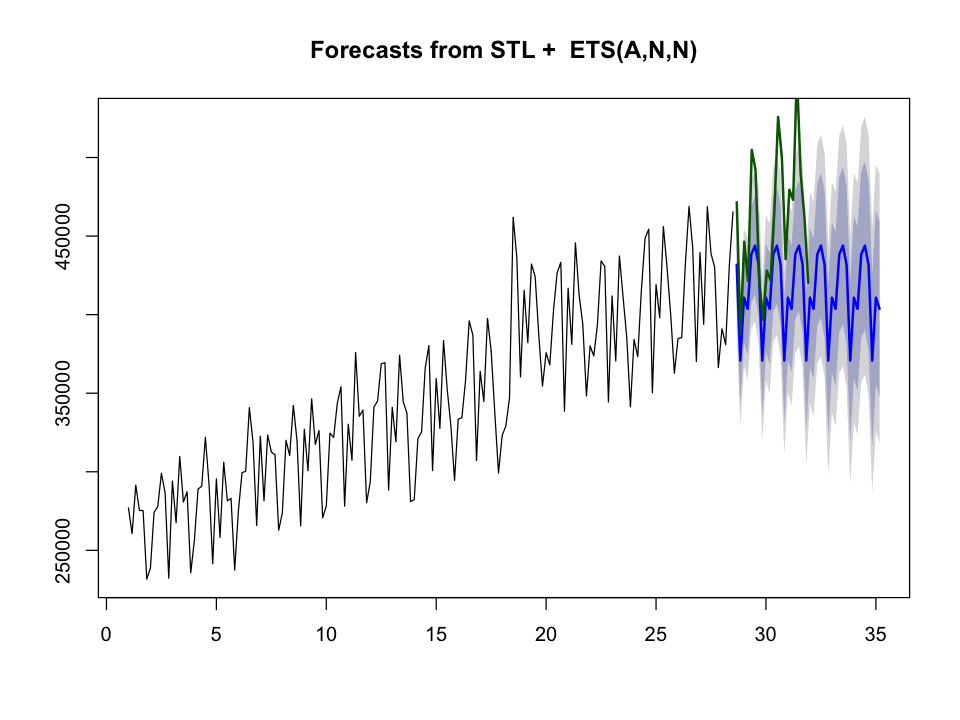

In [6]:
plot(forecast(stl.decompose, h = 2 * k))
lines(x_test, test, col = 'dark green', lwd = 2)

STL справился хуже всего. Интересно, что если не разбивать выборку на части, а построить предсказания по всем данным, STL срабоатет намного лучше. Это значит, что в последние 20 чисел значительно влияют на результат.

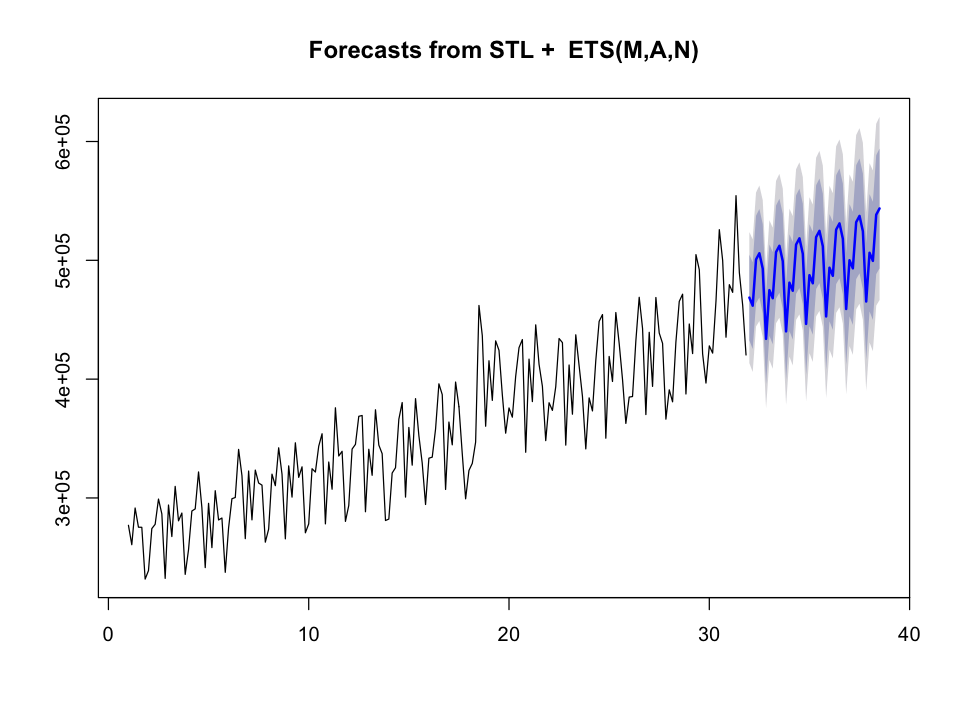

In [7]:
all_tSeries = ts(data = c(train, test), frequency = 6)
options(repr.plot.width = 8, repr.plot.height = 6)
all_stl.decompose <- stl(all_tSeries, s.window="periodic")
plot(forecast(all_stl.decompose, h = 2 * k))

Интереснее всего выглядит прогноз ARIMA.